In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Part 1. Cleaning and Creating the Usage Dataset 

In [2]:
# import the datasets
sites = pd.read_excel("Biking sites.xlsx")
sites.head()

,UnqID,ProgID,SurveyDescription,Easting,Northing,Location,Borough,Functional cycling area
0,CENCY001,CENCY,Central area cycle surveys,530251.49,178742.45,Millbank (south of Thorney Street),Westminster,Central
1,CENCY002,CENCY,Central area cycle surveys,533362.68,181824.45,Bishopsgate,City of London,Central
2,CENCY003,CENCY,Central area cycle surveys,532334.06,180520.37,Southwark Bridge,Southwark,Central
3,CENCY004,CENCY,Central area cycle surveys,532052.50,179677.64,Southwark Bridge Road,Southwark,Central
4,CENCY005,CENCY,Central area cycle surveys,533031.59,180213.46,Tooley Street,Southwark,Central


In [3]:
central = pd.read_csv("Central London.csv")
central.head()

/var/folders/c5/vj79w0bd045_ydxtls2kgjnm0000gn/T/ipykernel_2660/3358515189.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  central = pd.read_csv("Central London.csv")


,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,NaN,NaN,NaN
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,NaN,NaN,NaN
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0,NaN,NaN,NaN
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0,NaN,NaN,NaN


In [4]:
central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048366 entries, 0 to 1048365
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Survey wave (calendar quarter)  758163 non-null  object 
 1   Equivalent financial quarter    758163 non-null  object 
 2   Site ID                         758163 non-null  object 
 3   Location                        758163 non-null  object 
 4   Survey date                     748007 non-null  object 
 5   Weather                         746329 non-null  object 
 6   Time                            758163 non-null  object 
 7   Period                          758163 non-null  object 
 8   Direction                       758163 non-null  object 
 9   Start hour                      758163 non-null  float64
 10  Start minute                    758163 non-null  float64
 11  Number of private cycles        758099 non-null  float64
 12  Number of cycl

In [5]:
inner = pd.read_csv("Inner London.csv")
inner.head()

/var/folders/c5/vj79w0bd045_ydxtls2kgjnm0000gn/T/ipykernel_2660/2912081143.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  inner = pd.read_csv("Inner London.csv")


,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1.0,0.0,1.0
1,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2.0,0.0,2.0
2,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2.0,0.0,2.0
3,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4.0,0.0,4.0
4,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4.0,0.0,4.0


In [6]:
inner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615168 entries, 0 to 615167
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Survey wave (year)          523776 non-null  float64
 1   Site ID                     523776 non-null  object 
 2   Location                    523776 non-null  object 
 3   Survey date                 521024 non-null  object 
 4   Weather                     519102 non-null  object 
 5   Time                        523770 non-null  object 
 6   Period                      523770 non-null  object 
 7   Direction                   523776 non-null  object 
 8   Start hour                  523770 non-null  float64
 9   Start minute                523770 non-null  float64
 10  Number of private cycles    523776 non-null  float64
 11  Number of cycle hire bikes  523776 non-null  float64
 12  Total cycles                523776 non-null  float64
dtypes: float64(6),

In [7]:
outer = pd.read_csv("Outer London.csv")
outer.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
0,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3
1,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3
2,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2
3,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4
4,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5


In [8]:
outer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375660 entries, 0 to 375659
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Survey wave (year)        375660 non-null  int64 
 1   Site ID                   375660 non-null  object
 2   Location                  375660 non-null  object
 3   Survey date               374492 non-null  object
 4   Weather                   374692 non-null  object
 5   Time                      375660 non-null  object
 6   Period                    375660 non-null  object
 7   Direction                 375660 non-null  object
 8   Start hour                375660 non-null  int64 
 9   Start minute              375660 non-null  int64 
 10  Number of male cycles     375660 non-null  int64 
 11  Number of female cycles   375660 non-null  int64 
 12  Number of unknown cycles  375660 non-null  int64 
 13  Total cycles              375660 non-null  int64 
dtypes: i

In [9]:
# Merge the 3 datasets on usage to form one single London-wide dataset
frames = [central, inner, outer]
london = pd.concat(frames)

In [10]:
london

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,...,Number of private cycles,Number of cycle hire bikes,Total cycles,Unnamed: 14,Unnamed: 15,Unnamed: 16,Survey wave (year),Number of male cycles,Number of female cycles,Number of unknown cycles
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,...,15.0,0.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,...,35.0,0.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,...,59.0,2.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,...,73.0,0.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375655,NaN,NaN,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2045 - 2100,Evening (19:00-22:00),Southbound,20.0,...,NaN,NaN,1.0,NaN,NaN,NaN,2021.0,1.0,0.0,0.0
375656,NaN,NaN,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2100 - 2115,Evening (19:00-22:00),Southbound,21.0,...,NaN,NaN,2.0,NaN,NaN,NaN,2021.0,2.0,0.0,0.0
375657,NaN,NaN,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2115 - 2130,Evening (19:00-22:00),Southbound,21.0,...,NaN,NaN,0.0,NaN,NaN,NaN,2021.0,0.0,0.0,0.0
375658,NaN,NaN,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2130 - 2145,Evening (19:00-22:00),Southbound,21.0,...,NaN,NaN,0.0,NaN,NaN,NaN,2021.0,0.0,0.0,0.0


In [11]:
london.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039194 entries, 0 to 375659
Data columns (total 21 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Survey wave (calendar quarter)  object 
 1   Equivalent financial quarter    object 
 2   Site ID                         object 
 3   Location                        object 
 4   Survey date                     object 
 5   Weather                         object 
 6   Time                            object 
 7   Period                          object 
 8   Direction                       object 
 9   Start hour                      float64
 10  Start minute                    float64
 11  Number of private cycles        float64
 12  Number of cycle hire bikes      float64
 13  Total cycles                    float64
 14  Unnamed: 14                     float64
 15  Unnamed: 15                     float64
 16  Unnamed: 16                     float64
 17  Survey wave (year)          

In [12]:
#clean the datasets to only contain the most relevant columns
london = london[['Survey wave (calendar quarter)','Site ID','Location', 'Total cycles']].copy()
london.head()

,Survey wave (calendar quarter),Site ID,Location,Total cycles
0,2014 Q1 (January-March),CENCY001,Millbank (south of Thorney Street),0.0
1,2014 Q1 (January-March),CENCY001,Millbank (south of Thorney Street),15.0
2,2014 Q1 (January-March),CENCY001,Millbank (south of Thorney Street),35.0
3,2014 Q1 (January-March),CENCY001,Millbank (south of Thorney Street),61.0
4,2014 Q1 (January-March),CENCY001,Millbank (south of Thorney Street),73.0


In [13]:
london.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039194 entries, 0 to 375659
Data columns (total 4 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Survey wave (calendar quarter)  object 
 1   Site ID                         object 
 2   Location                        object 
 3   Total cycles                    float64
dtypes: float64(1), object(3)
memory usage: 77.8+ MB


In [14]:
london.rename(columns={"Site ID": "UnqID"}, inplace=True)
london.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039194 entries, 0 to 375659
Data columns (total 4 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Survey wave (calendar quarter)  object 
 1   UnqID                           object 
 2   Location                        object 
 3   Total cycles                    float64
dtypes: float64(1), object(3)
memory usage: 77.8+ MB


In [15]:
# Merge the cycle usage dataset with the location of sites in order to have the boroughs
usage = pd.merge(london, sites, on="UnqID")
usage.head()

,Survey wave (calendar quarter),UnqID,Location_x,Total cycles,ProgID,SurveyDescription,Easting,Northing,Location_y,Borough,Functional cycling area
0,2014 Q1 (January-March),CENCY001,Millbank (south of Thorney Street),0.0,CENCY,Central area cycle surveys,530251.49,178742.45,Millbank (south of Thorney Street),Westminster,Central
1,2014 Q1 (January-March),CENCY001,Millbank (south of Thorney Street),15.0,CENCY,Central area cycle surveys,530251.49,178742.45,Millbank (south of Thorney Street),Westminster,Central
2,2014 Q1 (January-March),CENCY001,Millbank (south of Thorney Street),35.0,CENCY,Central area cycle surveys,530251.49,178742.45,Millbank (south of Thorney Street),Westminster,Central
3,2014 Q1 (January-March),CENCY001,Millbank (south of Thorney Street),61.0,CENCY,Central area cycle surveys,530251.49,178742.45,Millbank (south of Thorney Street),Westminster,Central
4,2014 Q1 (January-March),CENCY001,Millbank (south of Thorney Street),73.0,CENCY,Central area cycle surveys,530251.49,178742.45,Millbank (south of Thorney Street),Westminster,Central


In [16]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657599 entries, 0 to 1657598
Data columns (total 11 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Survey wave (calendar quarter)  758163 non-null   object 
 1   UnqID                           1657599 non-null  object 
 2   Location_x                      1657599 non-null  object 
 3   Total cycles                    1657599 non-null  float64
 4   ProgID                          1657599 non-null  object 
 5   SurveyDescription               1657599 non-null  object 
 6   Easting                         1657599 non-null  float64
 7   Northing                        1657599 non-null  float64
 8   Location_y                      1657599 non-null  object 
 9   Borough                         1657599 non-null  object 
 10  Functional cycling area         1657599 non-null  object 
dtypes: float64(3), object(8)
memory usage: 151.8+ MB


In [17]:
# remove unnecesary columns
usage = usage[['Survey wave (calendar quarter)','UnqID', 'Total cycles', 'Borough']].copy()
usage.head()

,Survey wave (calendar quarter),UnqID,Total cycles,Borough
0,2014 Q1 (January-March),CENCY001,0.0,Westminster
1,2014 Q1 (January-March),CENCY001,15.0,Westminster
2,2014 Q1 (January-March),CENCY001,35.0,Westminster
3,2014 Q1 (January-March),CENCY001,61.0,Westminster
4,2014 Q1 (January-March),CENCY001,73.0,Westminster


In [18]:
# total number of cycles surveyed by borough
usage.groupby("Borough")[["Total cycles"]].sum()

,Total cycles
Borough,
Barking & Dagenham,8940.0
Barnet,17893.0
Bexley,7499.0
Brent,35177.0
Bromley,19663.0
Camden,2163728.0
City of London,3055574.0
Croydon,18786.0
Ealing,70745.0


In [19]:
usage_final = usage.groupby("Borough")[["Total cycles"]].sum()
usage_final

,Total cycles
Borough,
Barking & Dagenham,8940.0
Barnet,17893.0
Bexley,7499.0
Brent,35177.0
Bromley,19663.0
Camden,2163728.0
City of London,3055574.0
Croydon,18786.0
Ealing,70745.0


# Part 2. Cleaning and Creating the Cycle Lanes Dataset 

In [20]:
# import the datasets
infra = pd.read_excel("CycleInfra.xlsx")
infra.head()

,FEATURE_ID,SVDATE,CLT_CARR,CLT_SEGREG,CLT_STEPP,CLT_PARSEG,CLT_SHARED,CLT_MANDAT,CLT_ADVIS,CLT_PRIORI,...,CLT_BBYPAS,CLT_PARKR,CLT_WATERR,CLT_PTIME,CLT_ACCESS,CLT_COLOUR,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry
0,RWG154837,2017-10-14 00:00:00,True,False,False,False,FALSE,FALSE,True,FALSE,...,False,False,False,False,NaN,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,NaN
1,RWG154839,2017-10-14 00:00:00,True,False,False,False,FALSE,FALSE,True,FALSE,...,False,False,False,False,NaN,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,NaN
2,RWG154848,2017-10-14 00:00:00,True,False,False,False,FALSE,FALSE,True,TRUE,...,False,False,False,False,NaN,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,NaN
3,RWG154853,2017-10-15 00:00:00,True,False,False,False,FALSE,FALSE,True,FALSE,...,False,False,False,False,NaN,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,NaN
4,RWG155003,2017-10-17 00:00:00,True,False,False,False,FALSE,TRUE,False,FALSE,...,False,False,False,False,NaN,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,NaN


In [21]:
# remove unnecesary columns
# infra = infra[['SVDATE','CLT_SEGREG','BOROUGH']].copy()
# infra.head()

In [22]:
#infra.info()

In [23]:
# rename the borough column
infra.rename(columns={"BOROUGH": "Borough"}, inplace=True)
infra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24976 entries, 0 to 24975
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FEATURE_ID  24976 non-null  object 
 1   SVDATE      24976 non-null  object 
 2   CLT_CARR    24976 non-null  bool   
 3   CLT_SEGREG  24976 non-null  bool   
 4   CLT_STEPP   24976 non-null  bool   
 5   CLT_PARSEG  24976 non-null  bool   
 6   CLT_SHARED  24976 non-null  object 
 7   CLT_MANDAT  24976 non-null  object 
 8   CLT_ADVIS   24976 non-null  bool   
 9   CLT_PRIORI  24976 non-null  object 
 10  CLT_CONTRA  24976 non-null  bool   
 11  CLT_BIDIRE  24976 non-null  bool   
 12  CLT_CBYPAS  24976 non-null  bool   
 13  CLT_BBYPAS  24976 non-null  bool   
 14  CLT_PARKR   24976 non-null  bool   
 15  CLT_WATERR  24976 non-null  bool   
 16  CLT_PTIME   24976 non-null  bool   
 17  CLT_ACCESS  2916 non-null   object 
 18  CLT_COLOUR  24976 non-null  object 
 19  Borough     24622 non-nul

In [24]:
# aggregate infrastructure (number of lanes) by borough
infra.groupby("Borough").sum()

,CLT_CARR,CLT_SEGREG,CLT_STEPP,CLT_PARSEG,CLT_ADVIS,CLT_CONTRA,CLT_BIDIRE,CLT_CBYPAS,CLT_BBYPAS,CLT_PARKR,CLT_WATERR,CLT_PTIME,geometry
Borough,,,,,,,,,,,,,
Barking & Dagenham,420,38,0,146,301,21,335,1,2,94,8,58,0.0
Barnet,90,37,0,18,22,7,337,0,0,191,13,39,0.0
Bexley,185,60,13,110,108,4,296,0,0,95,30,9,0.0
Brent,199,2,0,105,105,10,319,2,5,167,12,61,0.0
Bromley,185,34,1,79,109,4,290,1,0,157,4,17,0.0
Camden,718,118,19,64,228,145,76,0,5,32,6,145,0.0
City of London,310,52,1,9,123,107,83,0,0,0,0,10,0.0
Croydon,662,42,1,33,487,101,239,2,1,99,1,41,0.0
Ealing,639,66,3,155,366,72,552,1,4,184,30,130,0.0


In [25]:
infra_final= infra.groupby("Borough").sum()
infra_final.drop("geometry", axis=1, inplace=True)

In [26]:
infra_final

,CLT_CARR,CLT_SEGREG,CLT_STEPP,CLT_PARSEG,CLT_ADVIS,CLT_CONTRA,CLT_BIDIRE,CLT_CBYPAS,CLT_BBYPAS,CLT_PARKR,CLT_WATERR,CLT_PTIME
Borough,,,,,,,,,,,,
Barking & Dagenham,420,38,0,146,301,21,335,1,2,94,8,58
Barnet,90,37,0,18,22,7,337,0,0,191,13,39
Bexley,185,60,13,110,108,4,296,0,0,95,30,9
Brent,199,2,0,105,105,10,319,2,5,167,12,61
Bromley,185,34,1,79,109,4,290,1,0,157,4,17
Camden,718,118,19,64,228,145,76,0,5,32,6,145
City of London,310,52,1,9,123,107,83,0,0,0,0,10
Croydon,662,42,1,33,487,101,239,2,1,99,1,41
Ealing,639,66,3,155,366,72,552,1,4,184,30,130


# Part 3. Merging the Usage and Infrastructure Datasets

In [27]:
# Merge the cycle usage dataset with the infrastructure one
usage_infra = pd.merge (usage_final, infra_final, on="Borough")
usage_infra

,Total cycles,CLT_CARR,CLT_SEGREG,CLT_STEPP,CLT_PARSEG,CLT_ADVIS,CLT_CONTRA,CLT_BIDIRE,CLT_CBYPAS,CLT_BBYPAS,CLT_PARKR,CLT_WATERR,CLT_PTIME
Borough,,,,,,,,,,,,,
Barking & Dagenham,8940.0,420,38,0,146,301,21,335,1,2,94,8,58
Barnet,17893.0,90,37,0,18,22,7,337,0,0,191,13,39
Bexley,7499.0,185,60,13,110,108,4,296,0,0,95,30,9
Brent,35177.0,199,2,0,105,105,10,319,2,5,167,12,61
Bromley,19663.0,185,34,1,79,109,4,290,1,0,157,4,17
Camden,2163728.0,718,118,19,64,228,145,76,0,5,32,6,145
City of London,3055574.0,310,52,1,9,123,107,83,0,0,0,0,10
Croydon,18786.0,662,42,1,33,487,101,239,2,1,99,1,41
Ealing,70745.0,639,66,3,155,366,72,552,1,4,184,30,130


# Part 4. Logistic Regression

In [28]:
from statsmodels.formula.api import ols

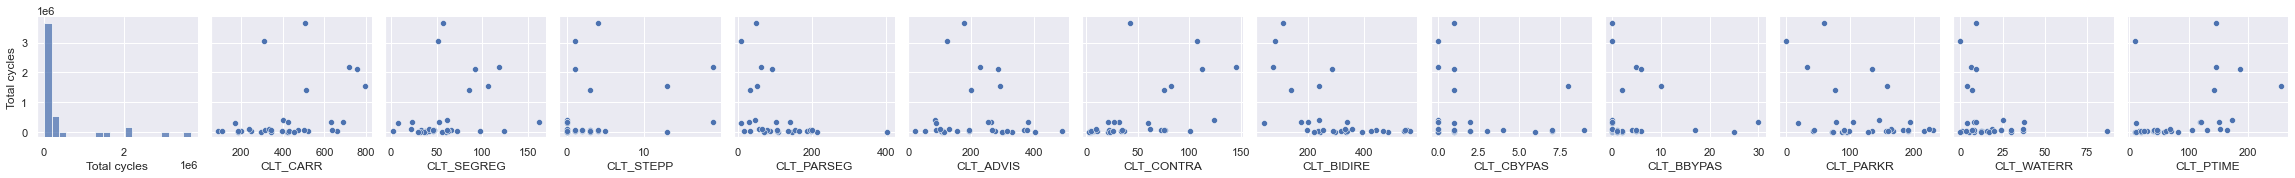

In [29]:
# Check for any immediately obvious correlations
sns.pairplot(usage_infra,
             y_vars=["Total cycles"])

The following types of asset are included in the database:

- Cycle lanes and tracks – including whether they are segregated or painted lanes
- Cycle parking, including the type and capacity of parking
- Signalised crossings for cycles
- Restricted route - Modal filters and traffic gates which allow cycles to pass but restrict car traffic
- Traffic calming, including the location of all speed humps in Greater London
- Advanced stop lines – boxes at junctions for people cycling
- Signals - early-release signals at junctions
- Signage - Signed cycle routes and other wayfinding
- Restricted Points – points where people cycling will have to dismount Paths through parks and other green spaces that can, and cannot, be cycled on

In [30]:
# Carry out OLS test for Carriage way
# Define the dependent variable.
y = usage_infra['Total cycles'] 
# Define the independent variable (the cause).
x = usage_infra['CLT_CARR'] 

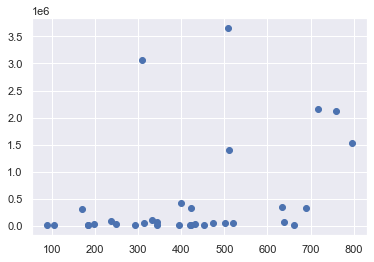

In [31]:
# Check for linearity with a scatter plot.
plt.scatter(x, y)  

In [32]:
# Create formula and pass through OLS methods:
f = 'y ~ x'
test = ols(f, data = usage_infra).fit()

In [33]:
# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     5.075
Date:                Thu, 18 Aug 2022   Prob (F-statistic):             0.0315
Time:                        19:40:50   Log-Likelihood:                -497.90
No. Observations:                  33   AIC:                             999.8
Df Residuals:                      31   BIC:                             1003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.768e+05   3.78e+05     -0.733      0.469   -1.05e+06    4.94e+05
x           1866.0167    828.307      2.253      0.031     176.673    3555.360
==============================================================================
Omnibus:                       29.724   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.957
Skew:                           2.209   Prob(JB):                     2.60e-13
Kurtosis:                       7.757   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Result shows statistical signifiance for carriageway (p < 0.05). 

Boroughs that have more cycle lanes on carrriageways seem to have more cyclying activity overall. 

In [34]:
# Carry out OLS test for Waterside route

# Define the dependent variable.
y = usage_infra['Total cycles'] 
# Define the independent variable (the cause).
x = usage_infra['CLT_WATERR'] 
# Create formula and pass through OLS methods:
f = 'y ~ x'
test = ols(f, data = usage_infra).fit()
# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.422
Date:                Thu, 18 Aug 2022   Prob (F-statistic):              0.130
Time:                        19:40:50   Log-Likelihood:                -499.16
No. Observations:                  33   AIC:                             1002.
Df Residuals:                      31   BIC:                             1005.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.425e+05   2.25e+05      3.306      0.002    2.84e+05     1.2e+06
x          -1.507e+04   9685.442     -1.556      0.130   -3.48e+04    4680.578
==============================================================================
Omnibus:                       23.136   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.949
Skew:                           1.923   Prob(JB):                     7.00e-08
Kurtosis:                       6.028   Cond. No.                         32.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Result is not statistically significant

In [46]:
# Carry out OLS test for Bidirectional route

# Define the dependent variable.
y = usage_infra['Total cycles'] 
# Define the independent variable (the cause).
x = usage_infra['CLT_BIDIRE'] 
# Create formula and pass through OLS methods:
f = 'y ~ x'
test = ols(f, data = usage_infra).fit()
# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     12.76
Date:                Thu, 18 Aug 2022   Prob (F-statistic):            0.00118
Time:                        21:02:14   Log-Likelihood:                -494.71
No. Observations:                  33   AIC:                             993.4
Df Residuals:                      31   BIC:                             996.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.582e+06   3.34e+05      4.732      0.000       9e+05    2.26e+06
x          -3575.6257   1001.148     -3.572      0.001   -5617.481   -1533.770
==============================================================================
Omnibus:                       13.743   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.916
Skew:                           1.351   Prob(JB):                     0.000951
Kurtosis:                       4.680   Cond. No.                         792.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

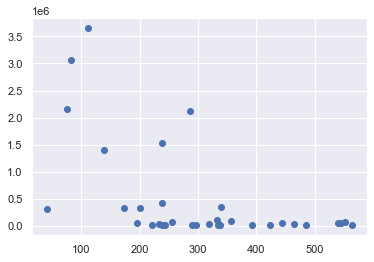

In [47]:
# Check for linearity with a scatter plot.
plt.scatter(x, y)  

Most significant result so far. 

In [36]:
# Carry out OLS test for Contraflow track

# Define the dependent variable.
y = usage_infra['Total cycles'] 
# Define the independent variable (the cause).
x = usage_infra['CLT_CONTRA'] 
# Create formula and pass through OLS methods:
f = 'y ~ x'
test = ols(f, data = usage_infra).fit()
# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     12.66
Date:                Thu, 18 Aug 2022   Prob (F-statistic):            0.00123
Time:                        19:40:50   Log-Likelihood:                -494.75
No. Observations:                  33   AIC:                             993.5
Df Residuals:                      31   BIC:                             996.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.656e+04   2.15e+05     -0.357      0.724   -5.14e+05    3.61e+05
x           1.278e+04   3593.209      3.557      0.001    5454.214    2.01e+04
==============================================================================
Omnibus:                       32.004   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.435
Skew:                           2.131   Prob(JB):                     4.63e-19
Kurtosis:                       9.576   Cond. No.                         90.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Also very significant

In [37]:
# Carry out OLS test for Parkroute 

# Define the dependent variable.
y = usage_infra['Total cycles'] 
# Define the independent variable (the cause).
x = usage_infra['CLT_PARKR'] 
# Create formula and pass through OLS methods:
f = 'y ~ x'
test = ols(f, data = usage_infra).fit()
# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     5.541
Date:                Thu, 18 Aug 2022   Prob (F-statistic):             0.0251
Time:                        19:40:50   Log-Likelihood:                -497.68
No. Observations:                  33   AIC:                             999.4
Df Residuals:                      31   BIC:                             1002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.208e+06   3.38e+05      3.571      0.001    5.18e+05     1.9e+06
x          -5940.6301   2523.779     -2.354      0.025   -1.11e+04    -793.350
==============================================================================
Omnibus:                       16.839   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.008
Skew:                           1.559   Prob(JB):                     7.46e-05
Kurtosis:                       5.024   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Carry out OLS test for CBYPASS track

# Define the dependent variable.
y = usage_infra['Total cycles'] 
# Define the independent variable (the cause).
x = usage_infra['CLT_CBYPAS'] 
# Create formula and pass through OLS methods:
f = 'y ~ x'
test = ols(f, data = usage_infra).fit()
# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.4119
Date:                Thu, 18 Aug 2022   Prob (F-statistic):              0.526
Time:                        19:40:50   Log-Likelihood:                -500.18
No. Observations:                  33   AIC:                             1004.
Df Residuals:                      31   BIC:                             1007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.793e+05   2.08e+05      2.785      0.009    1.55e+05       1e+06
x          -4.202e+04   6.55e+04     -0.642      0.526   -1.76e+05    9.15e+04
==============================================================================
Omnibus:                       24.967   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.366
Skew:                           2.062   Prob(JB):                     7.69e-09
Kurtosis:                       6.188   Cond. No.                         4.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Carry out OLS test for BBYPAS track

# Define the dependent variable.
y = usage_infra['Total cycles'] 
# Define the independent variable (the cause).
x = usage_infra['CLT_BBYPAS'] 
# Create formula and pass through OLS methods:
f = 'y ~ x'
test = ols(f, data = usage_infra).fit()
# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                   0.08733
Date:                Thu, 18 Aug 2022   Prob (F-statistic):              0.770
Time:                        19:40:50   Log-Likelihood:                -500.35
No. Observations:                  33   AIC:                             1005.
Df Residuals:                      31   BIC:                             1008.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.274e+05   1.93e+05      2.736      0.010    1.34e+05    9.21e+05
x          -7099.6266    2.4e+04     -0.296      0.770   -5.61e+04    4.19e+04
==============================================================================
Omnibus:                       25.479   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.845
Skew:                           2.092   Prob(JB):                     3.67e-09
Kurtosis:                       6.278   Cond. No.                         9.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NO difference

In [40]:
# Carry out OLS test for Partially segregated track

# Define the dependent variable.
y = usage_infra['Total cycles'] 
# Define the independent variable (the cause).
x = usage_infra['CLT_PARSEG'] 
# Create formula and pass through OLS methods:
f = 'y ~ x'
test = ols(f, data = usage_infra).fit()
# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     4.634
Date:                Thu, 18 Aug 2022   Prob (F-statistic):             0.0392
Time:                        19:40:50   Log-Likelihood:                -498.10
No. Observations:                  33   AIC:                             1000.
Df Residuals:                      31   BIC:                             1003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.533e+05   2.62e+05      3.632      0.001    4.18e+05    1.49e+06
x          -4255.4452   1976.716     -2.153      0.039   -8286.985    -223.906
==============================================================================
Omnibus:                       21.408   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.540
Skew:                           1.828   Prob(JB):                     6.35e-07
Kurtosis:                       5.718   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Carry out OLS test for STEPP track

# Define the dependent variable.
y = usage_infra['Total cycles'] 
# Define the independent variable (the cause).
x = usage_infra['CLT_STEPP'] 
# Create formula and pass through OLS methods:
f = 'y ~ x'
test = ols(f, data = usage_infra).fit()
# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     2.292
Date:                Thu, 18 Aug 2022   Prob (F-statistic):              0.140
Time:                        19:40:50   Log-Likelihood:                -499.22
No. Observations:                  33   AIC:                             1002.
Df Residuals:                      31   BIC:                             1005.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.48e+05    1.9e+05      1.834      0.076   -3.91e+04    7.35e+05
x           4.793e+04   3.17e+04      1.514      0.140   -1.66e+04    1.12e+05
==============================================================================
Omnibus:                       28.878   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.329
Skew:                           2.213   Prob(JB):                     4.33e-12
Kurtosis:                       7.298   Cond. No.                         7.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Carry out OLS test for PTIME track

# Define the dependent variable.
y = usage_infra['Total cycles'] 
# Define the independent variable (the cause).
x = usage_infra['CLT_PTIME'] 
# Create formula and pass through OLS methods:
f = 'y ~ x'
test = ols(f, data = usage_infra).fit()
# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     5.584
Date:                Thu, 18 Aug 2022   Prob (F-statistic):             0.0246
Time:                        19:40:50   Log-Likelihood:                -497.66
No. Observations:                  33   AIC:                             999.3
Df Residuals:                      31   BIC:                             1002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.048e+04   2.54e+05      0.081      0.936   -4.98e+05    5.39e+05
x           5761.5890   2438.288      2.363      0.025     788.668    1.07e+04
==============================================================================
Omnibus:                       32.181   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.097
Skew:                           2.368   Prob(JB):                     1.63e-15
Kurtosis:                       8.205   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Carry out OLS test for fully segregated tracks

# Define the dependent variable.
y = usage_infra['Total cycles'] 
# Define the independent variable (the cause).
x = usage_infra['CLT_SEGREG'] 
# Create formula and pass through OLS methods:
f = 'y ~ x'
test = ols(f, data = usage_infra).fit()
# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2.778
Date:                Thu, 18 Aug 2022   Prob (F-statistic):              0.106
Time:                        20:59:46   Log-Likelihood:                -498.98
No. Observations:                  33   AIC:                             1002.
Df Residuals:                      31   BIC:                             1005.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.458e+04   3.16e+05      0.141      0.889   -6.01e+05     6.9e+05
x           7880.9427   4728.792      1.667      0.106   -1763.492    1.75e+04
==============================================================================
Omnibus:                       28.476   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.089
Skew:                           2.157   Prob(JB):                     4.89e-12
Kurtosis:                       7.391   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Carry out OLS test for fully advisory tracks

# Define the dependent variable.
y = usage_infra['Total cycles'] 
# Define the independent variable (the cause).
x = usage_infra['CLT_ADVIS'] 
# Create formula and pass through OLS methods:
f = 'y ~ x'
test = ols(f, data = usage_infra).fit()
# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                   0.09917
Date:                Thu, 18 Aug 2022   Prob (F-statistic):              0.755
Time:                        21:00:27   Log-Likelihood:                -500.34
No. Observations:                  33   AIC:                             1005.
Df Residuals:                      31   BIC:                             1008.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.985e+05   3.57e+05      1.675      0.104    -1.3e+05    1.33e+06
x           -458.4895   1455.909     -0.315      0.755   -3427.835    2510.856
==============================================================================
Omnibus:                       25.594   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.204
Skew:                           2.097   Prob(JB):                     3.07e-09
Kurtosis:                       6.304   Cond. No.                         525.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Export the infrastructure summary sheet to Excel
infra_final.to_excel("Infrastructure by Borough.xlsx")
usage_infra.to_excel("Usage and Infrastructure by Borough.xlsx")